In [1]:
#load all libraries like pandas, standard scaler, matplot, etc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
#Load csv file from the content folder

df_social = pd.read_csv('/content/social_indicators_preprocessing_revised.csv')

In [3]:
#displaying all rows and column in dataframe df

pd.set_option("display.max_rows", None, "display.max_columns", None)
df_social

,country_code,year,LifeExpectancy_Female,LifeExpectancy_Male,LifeExpectancy_Total,LiteracyRate_AdultTotal,LiteracyRate_YouthTotal,Multidim_PovertyHeadcountRatio_UNDP,Multidim_PovertyHeadcountRatio_WorldBank,Water_BasicDrinkingServices_PercentofPop,Water_SafelyManagedDrinkingServices_PercentofPop,Water_BasicHandwashing_PercentofPop,Poverty_HeadcountRatio_NationalPovertyLines_Percent,Poverty_HeadcountRatio_SocietalPovertyLines_Percent,Unemployment_AdvancedEducation_Percent,Unemployment_BasicEducation_Percent,Unemployment_IntermediateEducation_Percent,Unemployment_Total_Percent,Unemployment_YouthTotal_Percent,id,country_name,region
0,ABW,2021,77.315000,71.798000,74.626000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,Aruba,Latin America and the Caribbean
1,ABW,2022,77.681000,72.145000,74.992000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,Aruba,Latin America and the Caribbean
2,ABW,2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,Aruba,Latin America and the Caribbean
3,AFE,2021,65.073170,59.889797,62.449093,72.638908,82.804543,0.0,0.0,58.377556,0.000000,19.998667,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,Africa Eastern and Southern,Region Summary
4,AFE,2022,65.480353,60.352379,62.888463,72.981560,83.036270,0.0,0.0,59.107461,0.000000,20.163136,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,Africa Eastern and Southern,Region Summary
5,AFE,2023,0.000000,0.000000,0.000000,73.275108,83.220390,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,Africa Eastern and Southern,Region Summary
6,AFG,2021,65.279000,58.915000,61.982000,37.000000,56.000000,0.0,0.0,79.693078,29.313843,47.368945,0.0,0.0,9.781000,6.754000,8.879000,5.679000,8.785000,NaN,Afghanistan,South Asia
7,AFG,2022,66.213000,59.766000,62.879000,0.000000,62.660000,0.0,0.0,82.175371,30.034098,48.214696,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,Afghanistan,South Asia
8,AFG,2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,Afghanistan,South Asia
9,AFW,2021,58.035597,55.880937,56.946475,60.007320,71.266121,0.0,0.0,73.037463,29.321655,27.191494,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,Africa Western and Central,Region Summary


In [4]:
#Checking for missing values
missing_values = df_social.isnull().sum()

data_types = df_social.dtypes

print("Missing Values per Column:")
print(missing_values)

print("Data Types per Column:")
print(data_types)

Missing Values per Column:
country_code                                             0
year                                                     0
LifeExpectancy_Female                                    0
LifeExpectancy_Male                                      0
LifeExpectancy_Total                                     0
LiteracyRate_AdultTotal                                  0
LiteracyRate_YouthTotal                                  0
Multidim_PovertyHeadcountRatio_UNDP                      0
Multidim_PovertyHeadcountRatio_WorldBank                 0
Water_BasicDrinkingServices_PercentofPop                 0
Water_SafelyManagedDrinkingServices_PercentofPop         0
Water_BasicHandwashing_PercentofPop                      0
Poverty_HeadcountRatio_NationalPovertyLines_Percent      0
Poverty_HeadcountRatio_SocietalPovertyLines_Percent      0
Unemployment_AdvancedEducation_Percent                   0
Unemployment_BasicEducation_Percent                      0
Unemployment_IntermediateEduc

In [7]:
numeric_cols = df_social.select_dtypes(include=['float64', 'int64']).columns
df_social[numeric_cols].describe()

,year,LifeExpectancy_Female,LifeExpectancy_Male,LifeExpectancy_Total,LiteracyRate_AdultTotal,LiteracyRate_YouthTotal,Multidim_PovertyHeadcountRatio_UNDP,Multidim_PovertyHeadcountRatio_WorldBank,Water_BasicDrinkingServices_PercentofPop,Water_SafelyManagedDrinkingServices_PercentofPop,Water_BasicHandwashing_PercentofPop,Poverty_HeadcountRatio_NationalPovertyLines_Percent,Poverty_HeadcountRatio_SocietalPovertyLines_Percent,Unemployment_AdvancedEducation_Percent,Unemployment_BasicEducation_Percent,Unemployment_IntermediateEducation_Percent,Unemployment_Total_Percent,Unemployment_YouthTotal_Percent
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,2022.000000,48.057538,44.659354,46.314503,23.753352,28.957431,0.165288,1.048997,54.507886,28.259125,14.641856,2.869424,3.430451,3.015850,4.299490,3.749268,3.324060,7.885865
std,0.817009,36.172781,33.655661,34.874139,38.382360,42.864634,2.763544,6.569848,45.069070,39.390815,28.971964,8.926492,9.054487,4.916005,6.715472,5.848019,4.795453,10.625953
min,2021.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2022.000000,68.234500,62.863000,65.310000,0.000000,0.000000,0.000000,0.000000,73.971518,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2023.000000,77.489000,71.305250,74.261250,65.835869,80.996019,0.000000,0.000000,97.808296,68.272377,11.751842,0.000000,0.000000,4.330250,7.760250,6.409250,5.569982,14.177750
max,2023.000000,87.980000,83.240000,85.532683,100.000000,100.000000,68.400000,80.900000,100.000000,100.000000,97.400000,73.600000,65.700000,31.879000,42.755000,57.283000,34.153000,65.219000


In [6]:
#Drop id Column
df_social.drop(columns=["id"], inplace=True)

print("'id' column removed successfully!")

'id' column removed successfully!


In [8]:
import numpy as np

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    return outliers[["country_name", "region", column]]

outlier_results = {}

for col in numeric_cols:
    outliers = detect_outliers_iqr(df_social, col)
    if not outliers.empty:
        outlier_results[col] = outliers

for col, data in outlier_results.items():
    print(f"Outliers in '{col}':")
    display(data)

Outliers in 'Multidim_PovertyHeadcountRatio_UNDP':


,country_name,region,Multidim_PovertyHeadcountRatio_UNDP
228,Fiji,East Asia and Pacific,1.5
369,Cambodia,East Asia and Pacific,16.6
453,Madagascar,Sub-Saharan Africa,68.4
462,Mexico,Latin America and the Caribbean,4.1
522,Nigeria,Sub-Saharan Africa,33.0
558,Peru,Latin America and the Caribbean,6.6
756,Uzbekistan,Europe and Central Asia,1.7


Outliers in 'Multidim_PovertyHeadcountRatio_WorldBank':


,country_name,region,Multidim_PovertyHeadcountRatio_WorldBank
27,Argentina,Latin America and the Caribbean,0.9
28,Argentina,Latin America and the Caribbean,0.6
30,Armenia,Europe and Central Asia,0.5
31,Armenia,Europe and Central Asia,0.8
42,Austria,Europe and Central Asia,0.7
51,Belgium,Europe and Central Asia,0.7
54,Benin,Sub-Saharan Africa,45.4
57,Burkina Faso,Sub-Saharan Africa,53.0
61,Bangladesh,South Asia,6.6
63,Bulgaria,Europe and Central Asia,1.3


Outliers in 'Water_BasicHandwashing_PercentofPop':


,country_name,region,Water_BasicHandwashing_PercentofPop
6,Afghanistan,South Asia,47.368945
7,Afghanistan,South Asia,48.214696
30,Armenia,Europe and Central Asia,94.414371
31,Armenia,Europe and Central Asia,94.423662
60,Bangladesh,South Asia,61.650730
61,Bangladesh,South Asia,61.728537
78,Belize,Latin America and the Caribbean,90.281556
79,Belize,Latin America and the Caribbean,90.288290
96,Bhutan,South Asia,93.248701
97,Bhutan,South Asia,93.204178


Outliers in 'Poverty_HeadcountRatio_NationalPovertyLines_Percent':


,country_name,region,Poverty_HeadcountRatio_NationalPovertyLines_Percent
27,Argentina,Latin America and the Caribbean,37.3
28,Argentina,Latin America and the Caribbean,39.2
30,Armenia,Europe and Central Asia,26.5
31,Armenia,Europe and Central Asia,24.8
42,Austria,Europe and Central Asia,14.8
51,Belgium,Europe and Central Asia,13.2
52,Belgium,Europe and Central Asia,12.3
57,Burkina Faso,Sub-Saharan Africa,43.2
61,Bangladesh,South Asia,18.7
63,Bulgaria,Europe and Central Asia,22.9


Outliers in 'Poverty_HeadcountRatio_SocietalPovertyLines_Percent':


,country_name,region,Poverty_HeadcountRatio_SocietalPovertyLines_Percent
27,Argentina,Latin America and the Caribbean,23.8
28,Argentina,Latin America and the Caribbean,22.8
30,Armenia,Europe and Central Asia,18.3
31,Armenia,Europe and Central Asia,20.1
42,Austria,Europe and Central Asia,12.5
51,Belgium,Europe and Central Asia,9.2
54,Benin,Sub-Saharan Africa,33.5
57,Burkina Faso,Sub-Saharan Africa,40.5
61,Bangladesh,South Asia,28.1
63,Bulgaria,Europe and Central Asia,15.8


Outliers in 'Unemployment_AdvancedEducation_Percent':


,country_name,region,Unemployment_AdvancedEducation_Percent
12,Angola,Sub-Saharan Africa,17.111000
61,Bangladesh,South Asia,11.777000
72,Bosnia and Herzegovina,Europe and Central Asia,11.992000
96,Bhutan,South Asia,11.473000
97,Bhutan,South Asia,12.004000
99,Botswana,Sub-Saharan Africa,14.207000
100,Botswana,Sub-Saharan Africa,18.482000
101,Botswana,Sub-Saharan Africa,15.812000
126,Cameroon,Sub-Saharan Africa,18.775000
135,Colombia,Latin America and the Caribbean,15.310000


Outliers in 'Unemployment_BasicEducation_Percent':


,country_name,region,Unemployment_BasicEducation_Percent
99,Botswana,Sub-Saharan Africa,27.220000
100,Botswana,Sub-Saharan Africa,25.352000
101,Botswana,Sub-Saharan Africa,27.148000
210,Spain,Europe and Central Asia,20.971000
354,Jordan,Middle East and North Africa,22.862000
355,Jordan,Middle East and North Africa,20.469000
399,St. Lucia,Latin America and the Caribbean,29.244000
400,St. Lucia,Latin America and the Caribbean,19.774000
471,North Macedonia,Europe and Central Asia,23.061000
472,North Macedonia,Europe and Central Asia,22.011000


Outliers in 'Unemployment_IntermediateEducation_Percent':


,country_name,region,Unemployment_IntermediateEducation_Percent
12,Angola,Sub-Saharan Africa,29.437000
97,Bhutan,South Asia,17.649000
99,Botswana,Sub-Saharan Africa,29.354000
100,Botswana,Sub-Saharan Africa,29.526000
101,Botswana,Sub-Saharan Africa,29.242000
135,Colombia,Latin America and the Caribbean,16.385000
144,Costa Rica,Latin America and the Caribbean,21.012000
145,Costa Rica,Latin America and the Caribbean,16.066000
267,Greece,Europe and Central Asia,16.986000
400,St. Lucia,Latin America and the Caribbean,16.531000


Outliers in 'Unemployment_Total_Percent':


,country_name,region,Unemployment_Total_Percent
12,Angola,Sub-Saharan Africa,15.799
13,Angola,Sub-Saharan Africa,14.124
72,Bosnia and Herzegovina,Europe and Central Asia,14.897
99,Botswana,Sub-Saharan Africa,23.106
100,Botswana,Sub-Saharan Africa,23.615
101,Botswana,Sub-Saharan Africa,23.381
144,Costa Rica,Latin America and the Caribbean,15.139
210,Spain,Europe and Central Asia,14.781
267,Greece,Europe and Central Asia,14.657
339,Iraq,Middle East and North Africa,16.173


Outliers in 'Unemployment_YouthTotal_Percent':


,country_name,region,Unemployment_YouthTotal_Percent
99,Botswana,Sub-Saharan Africa,44.948
100,Botswana,Sub-Saharan Africa,44.216
101,Botswana,Sub-Saharan Africa,45.594
144,Costa Rica,Latin America and the Caribbean,38.796
267,Greece,Europe and Central Asia,35.525
354,Jordan,Middle East and North Africa,43.738
355,Jordan,Middle East and North Africa,41.917
356,Jordan,Middle East and North Africa,39.242
399,St. Lucia,Latin America and the Caribbean,46.268
471,North Macedonia,Europe and Central Asia,36.332


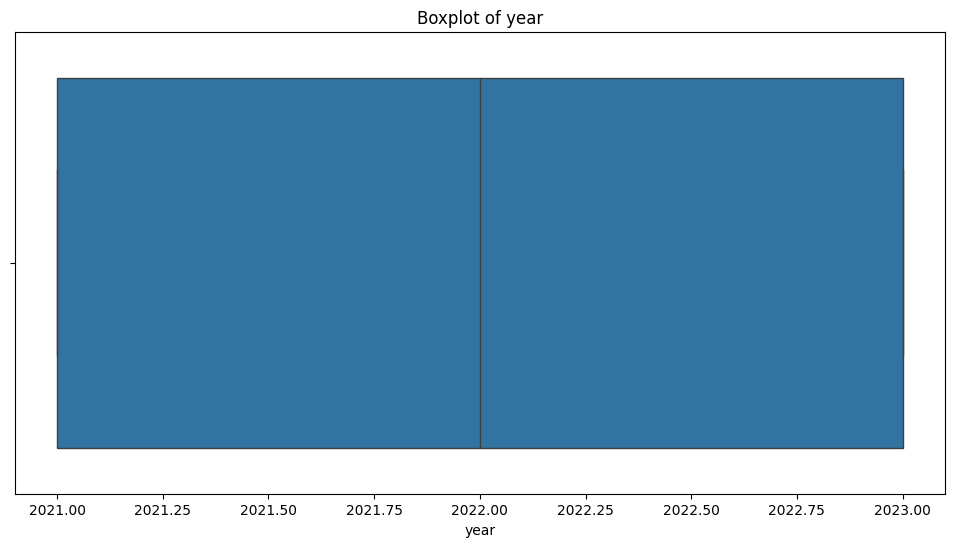

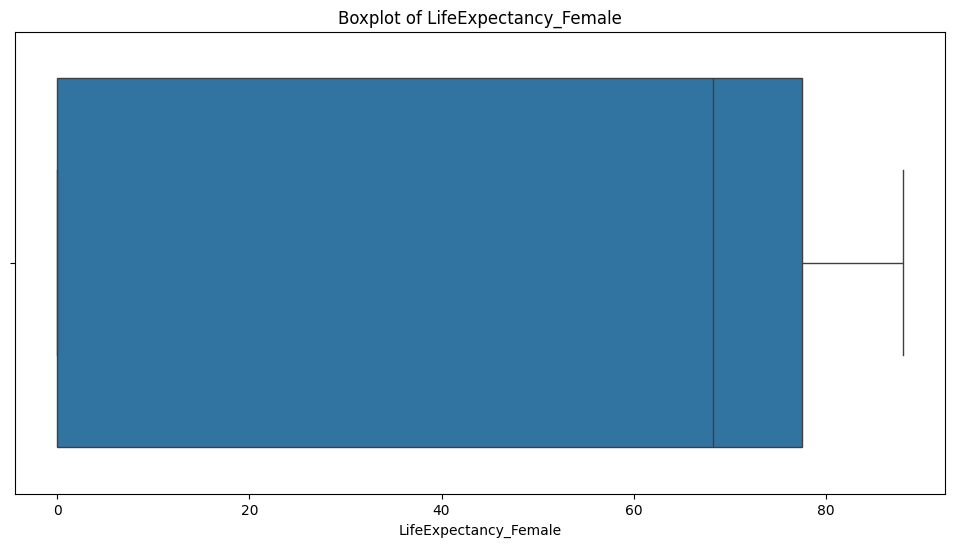

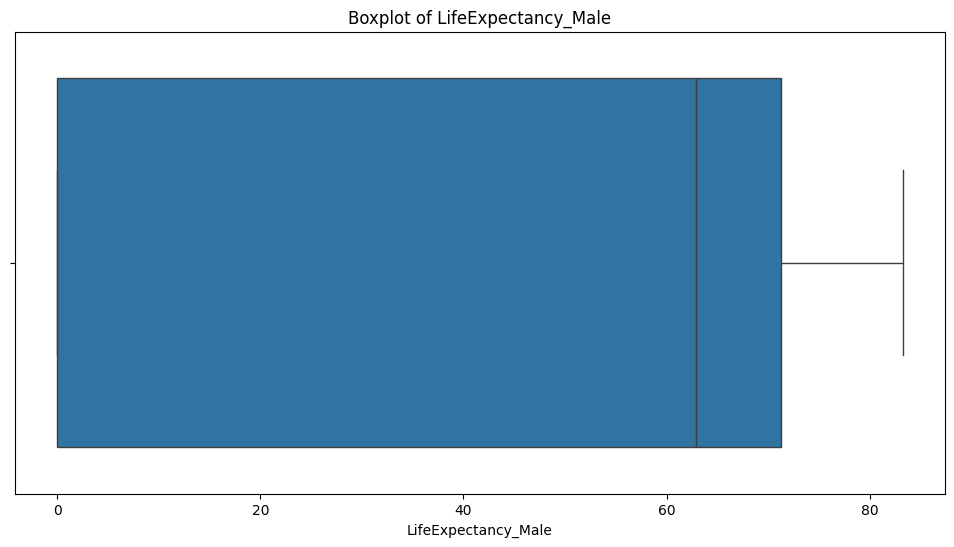

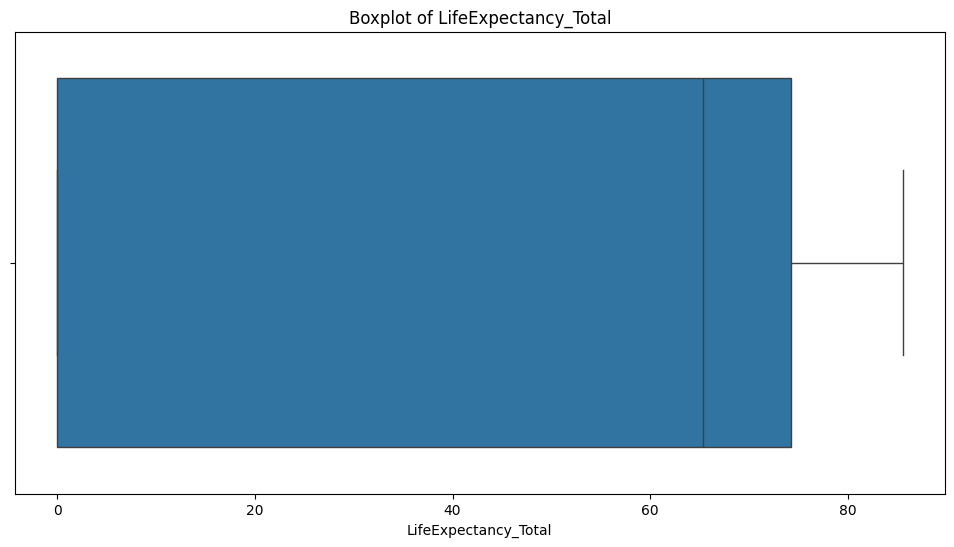

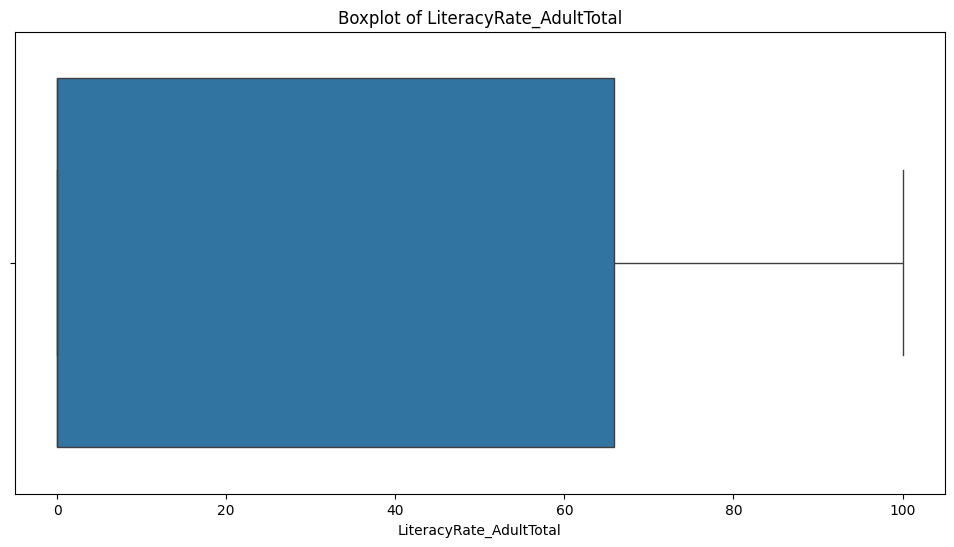

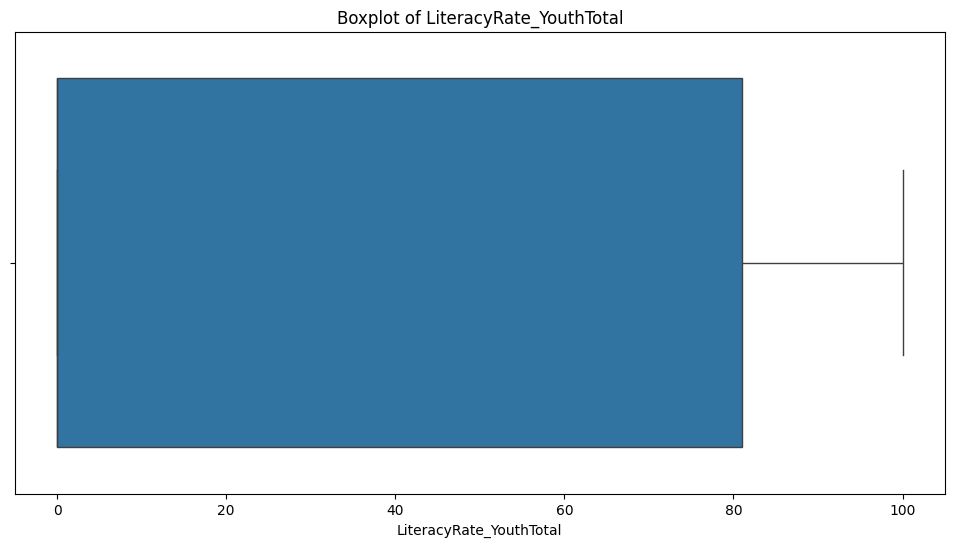

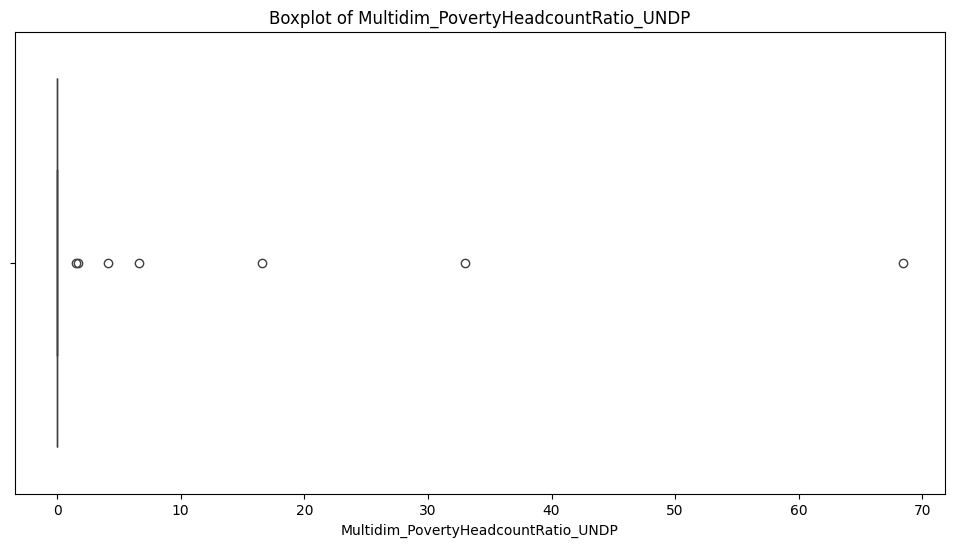

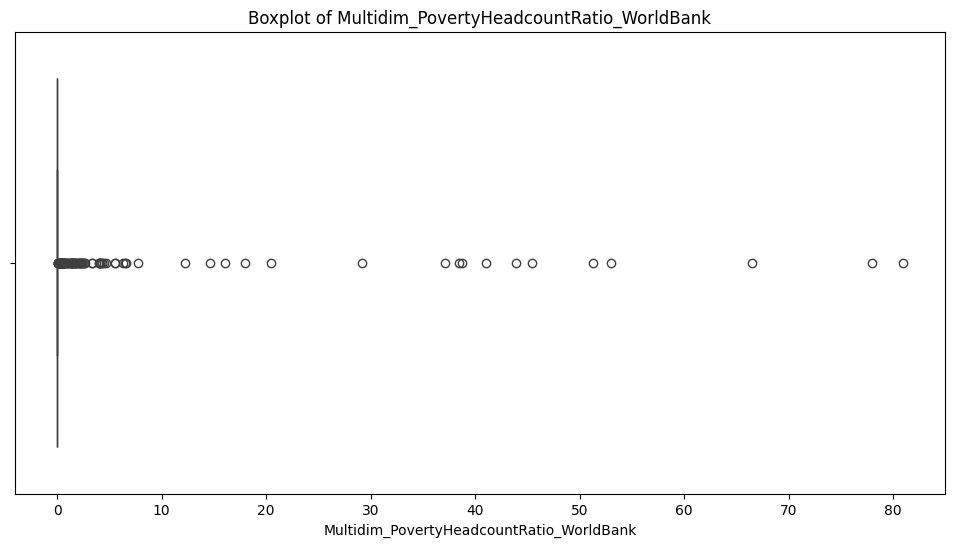

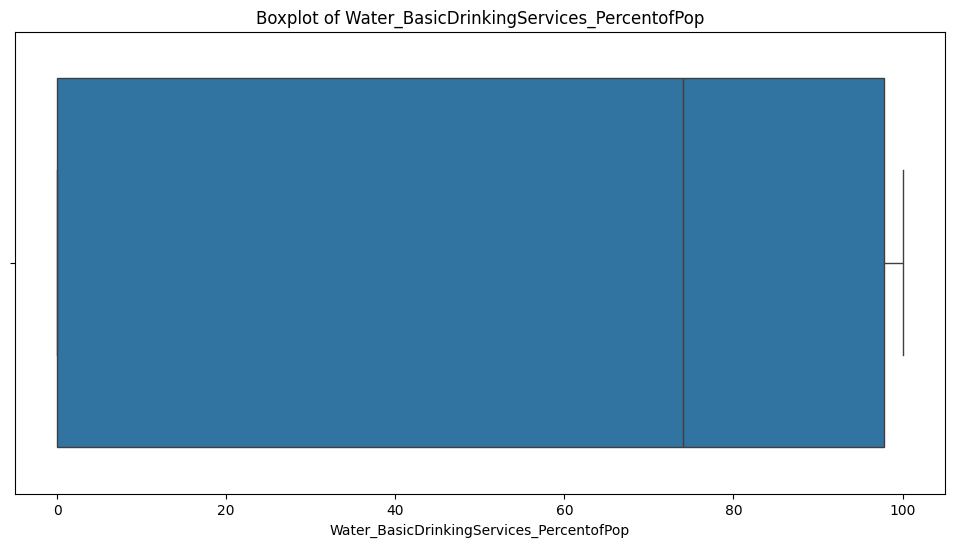

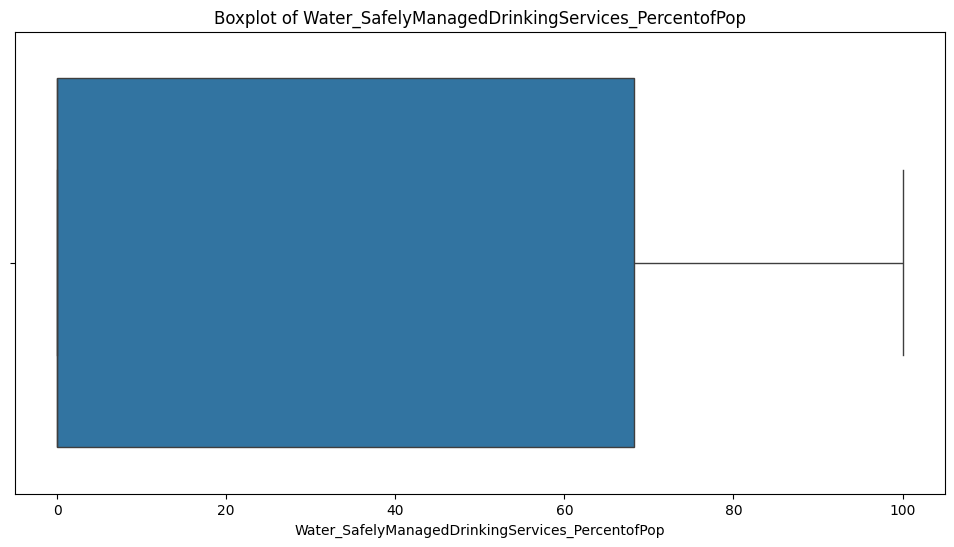

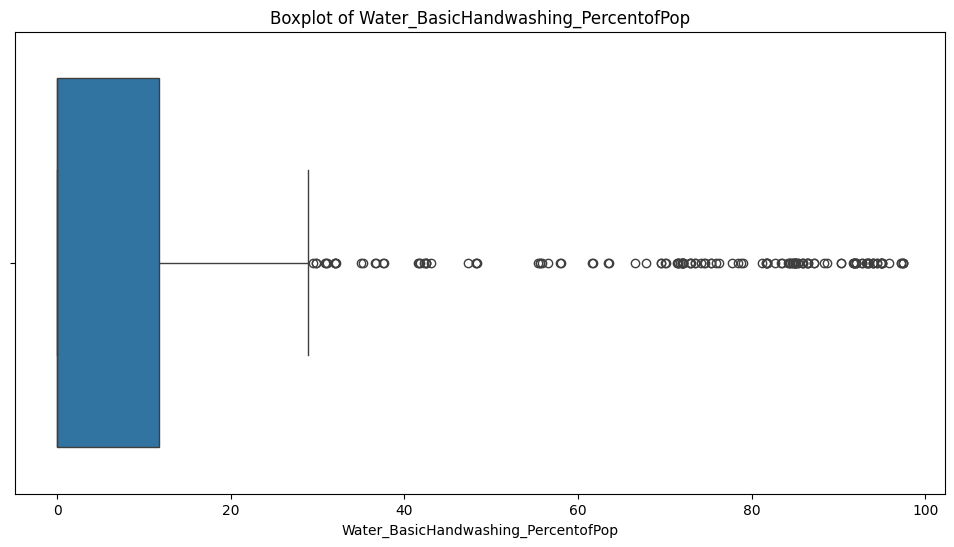

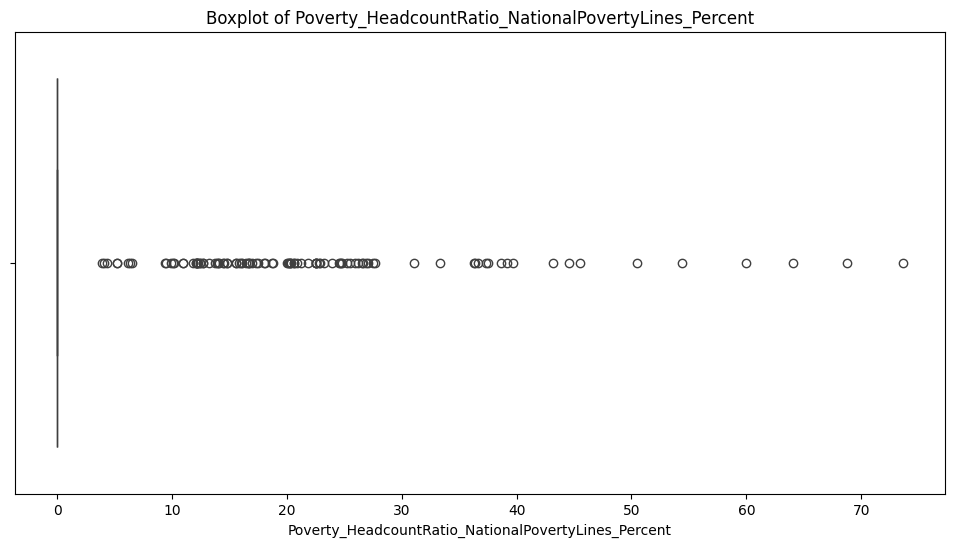

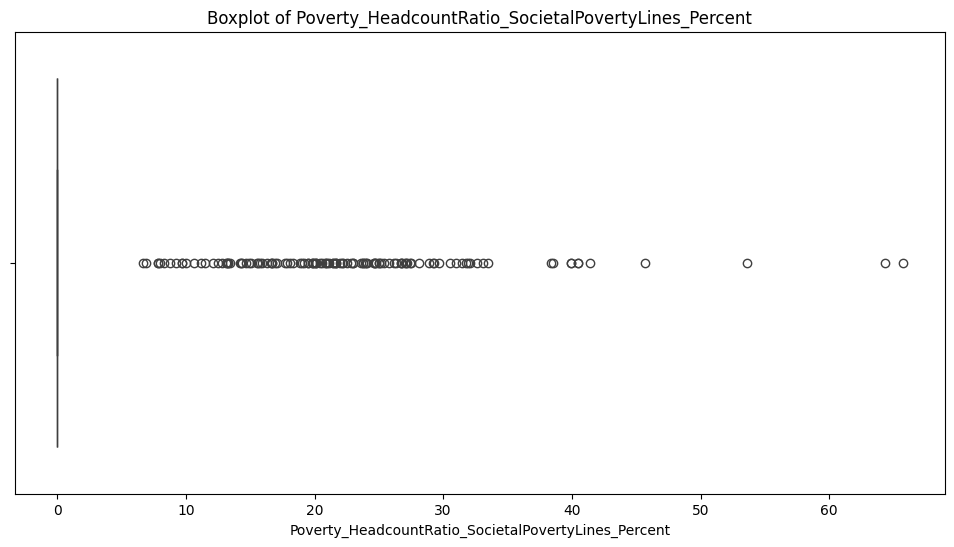

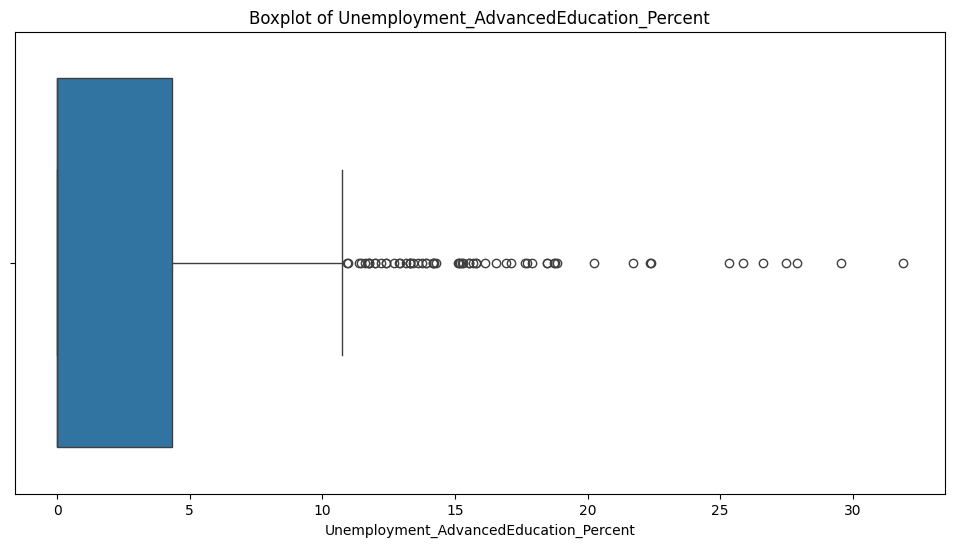

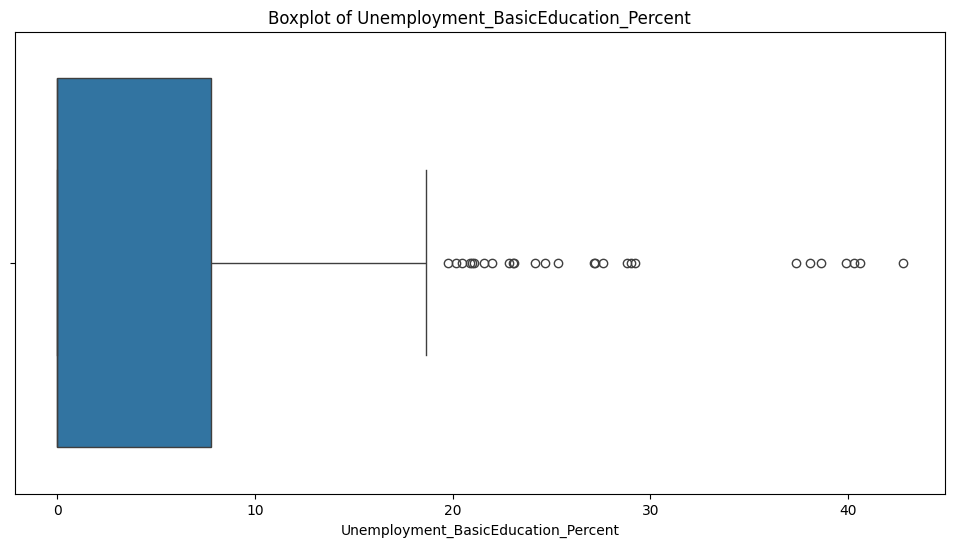

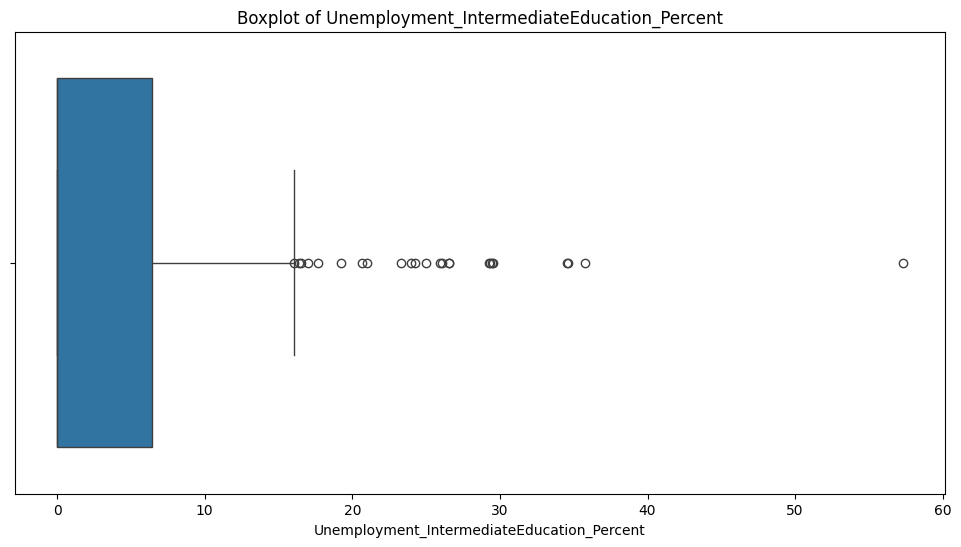

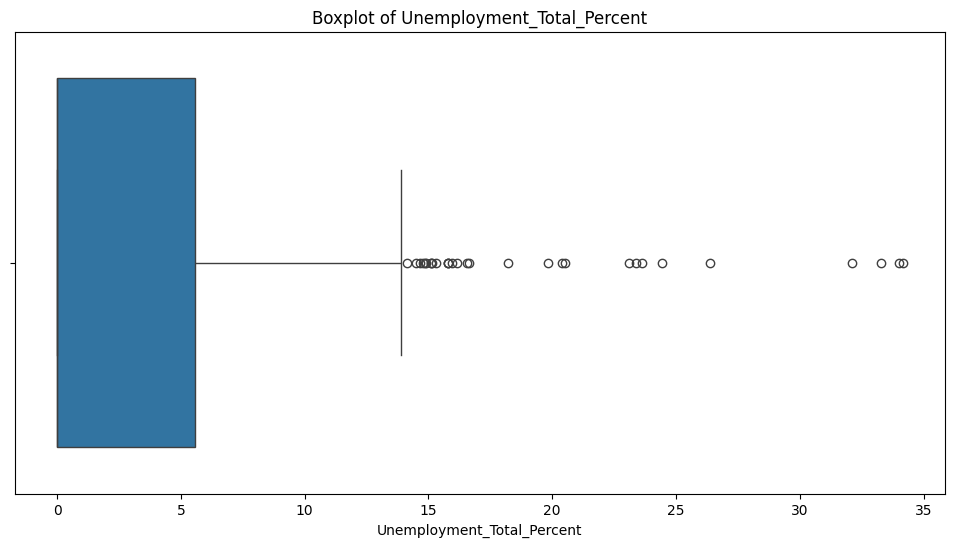

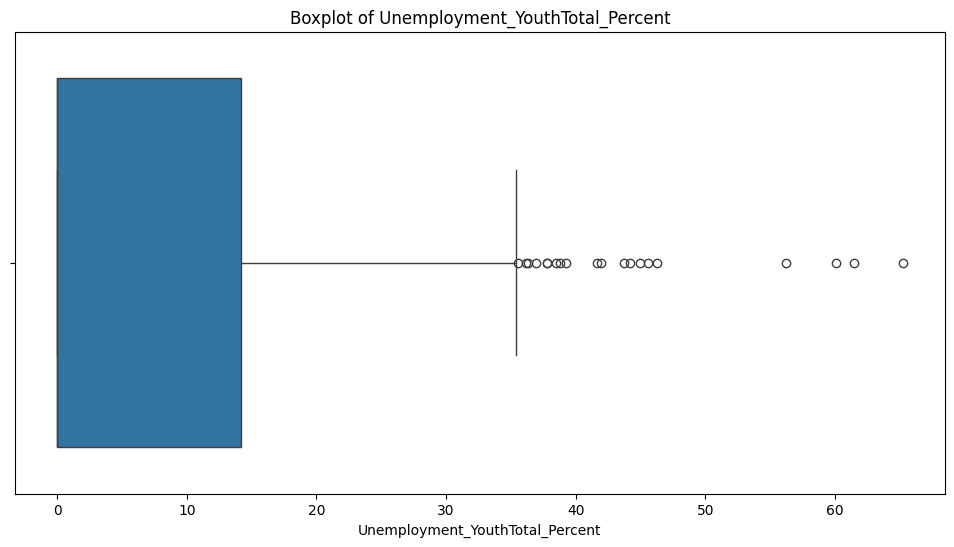

In [9]:
def plot_boxplot(data, column, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=data[column])
    plt.title(title)
    plt.show()

for col in numeric_cols:
    plot_boxplot(df_social, col, f"Boxplot of {col}")

In [10]:
#Preprocessing for indicator MultiDim_PovertyHeadcountRatio_UNDP
df_social[["Multidim_PovertyHeadcountRatio_UNDP"]].describe()

,Multidim_PovertyHeadcountRatio_UNDP
count,798.000000
mean,0.165288
std,2.763544
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,68.400000


In [11]:
# Calculate the 95th percentile for these six inidcators
Water_BasicHandwashing_cap = df_social["Water_BasicHandwashing_PercentofPop"].quantile(0.95)
Unemployment_AdvanceEducation_cap = df_social["Unemployment_AdvancedEducation_Percent"].quantile(0.95)
Unemployment_BasicEducation_cap = df_social["Unemployment_BasicEducation_Percent"].quantile(0.95)
Unemployment_IntermediateEducation_cap = df_social["Unemployment_IntermediateEducation_Percent"].quantile(0.95)
Unemployment_Total_Per_cap = df_social["Unemployment_Total_Percent"].quantile(0.95)
Unemployment_YouthTotal_Per_cap = df_social["Unemployment_YouthTotal_Percent"].quantile(0.95)



df_social["Water_BasicHandwashing_PercentofPop"] = df_social["Water_BasicHandwashing_PercentofPop"].clip(upper=Water_BasicHandwashing_cap)
df_social["Unemployment_AdvanceEducation_Percent"] = df_social["Unemployment_AdvancedEducation_Percent"].clip(upper=Unemployment_AdvanceEducation_cap)
df_social["Unemployment_BasicEducation_Percent"] = df_social["Unemployment_BasicEducation_Percent"].clip(upper=Unemployment_BasicEducation_cap)
df_social["Unemployment_IntermediateEducation_Percent"] = df_social["Unemployment_IntermediateEducation_Percent"].clip(upper=Unemployment_IntermediateEducation_cap)
df_social["Unemployment_Total_Percent"] = df_social["Unemployment_Total_Percent"].clip(upper=Unemployment_Total_Per_cap)
df_social["Unemployment_YouthTotal_Percent"] = df_social["Unemployment_YouthTotal_Percent"].clip(upper=Unemployment_YouthTotal_Per_cap)


print(f"Water_BasicHandwashing_PercentofPop at: {Water_BasicHandwashing_cap}")
print(f"Unemployment_AdvanceEducation_Percent at: {Unemployment_AdvanceEducation_cap}")
print(f"Unemployment_BasicEducation_Percent at: {Unemployment_BasicEducation_cap}")
print(f"Unemployment_IntermediateEducation_Percent at: {Unemployment_IntermediateEducation_cap}")
print(f"Unemployment_Total_Percent at: {Unemployment_Total_Per_cap}")
print(f"Unemployment_YouthTotal_Percent at: {Unemployment_YouthTotal_Per_cap}")


Water_BasicHandwashing_PercentofPop at: 86.3916021955
Unemployment_AdvanceEducation_Percent at: 13.638609954499998
Unemployment_BasicEducation_Percent at: 16.096449999999997
Unemployment_IntermediateEducation_Percent at: 13.117373194999997
Unemployment_Total_Percent at: 12.106749999999998
Unemployment_YouthTotal_Percent at: 28.631149999999998


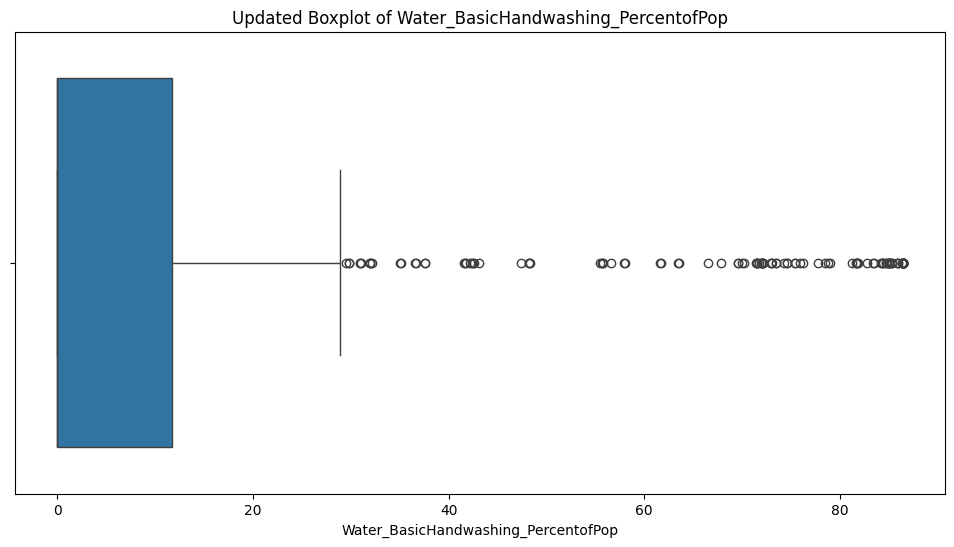

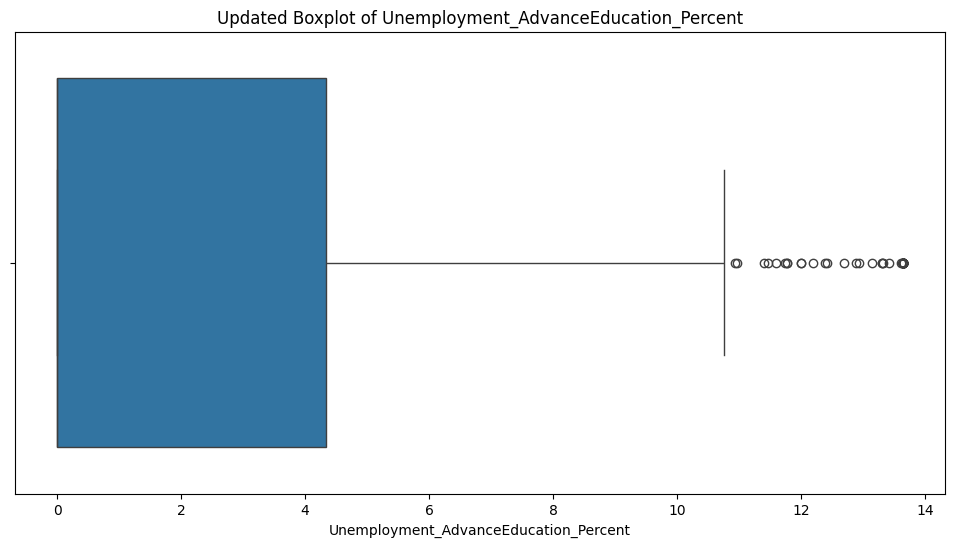

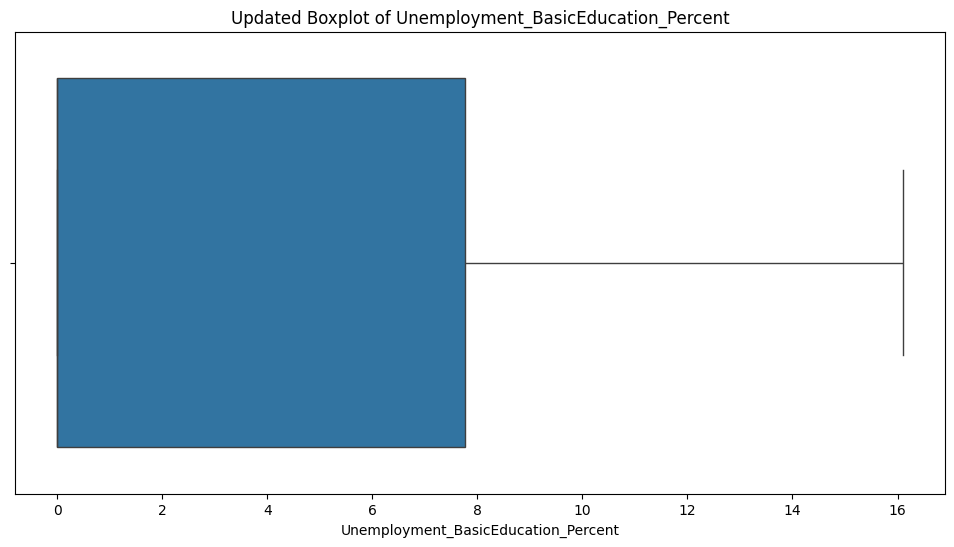

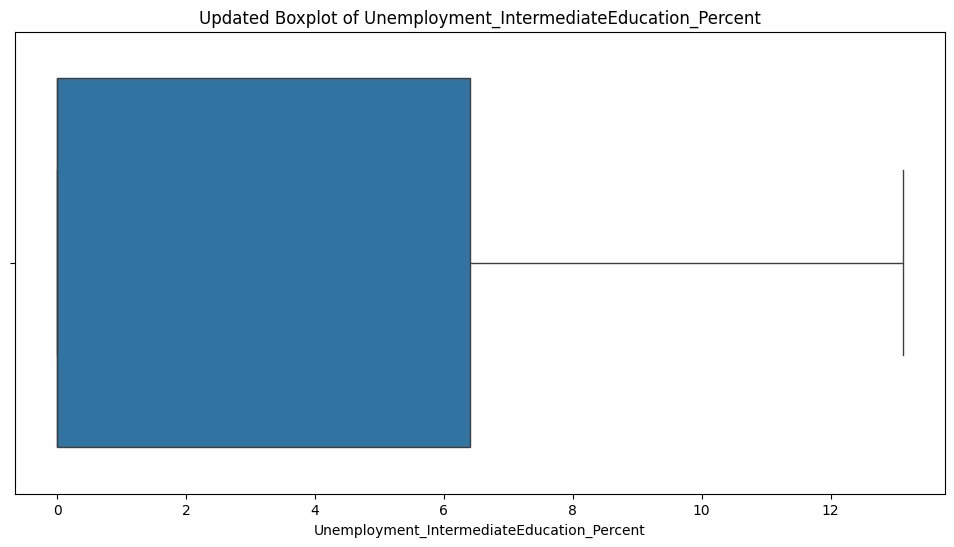

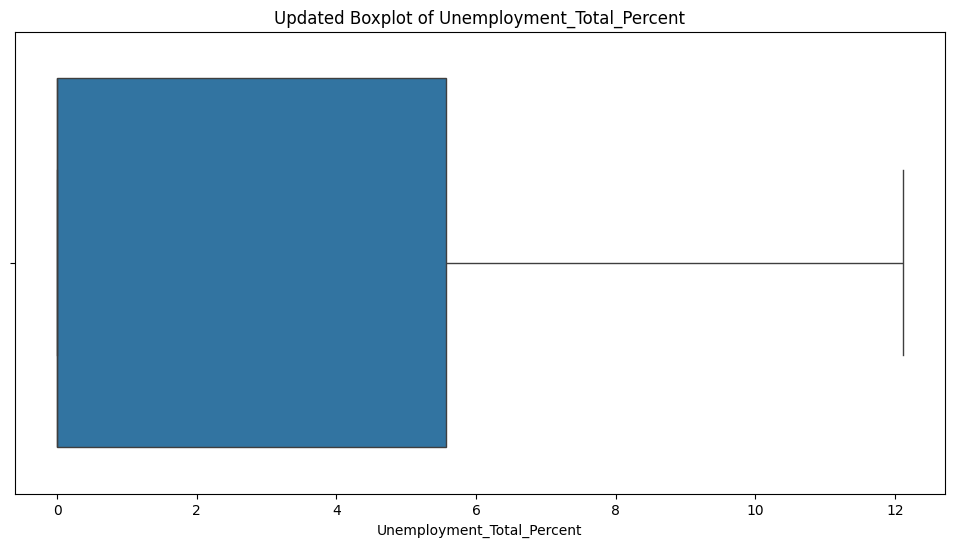

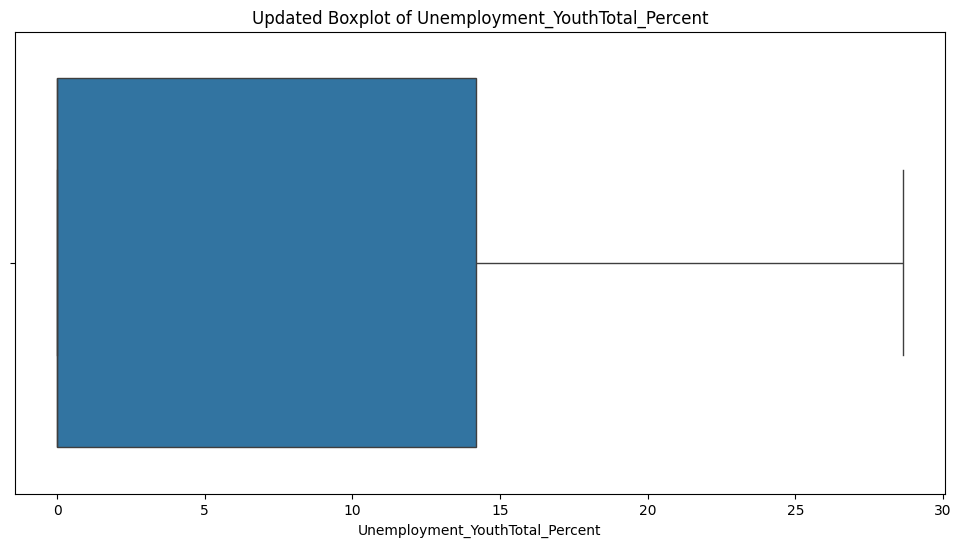

In [12]:
plot_boxplot(df_social, "Water_BasicHandwashing_PercentofPop", "Updated Boxplot of Water_BasicHandwashing_PercentofPop")
plot_boxplot(df_social, "Unemployment_AdvanceEducation_Percent", "Updated Boxplot of Unemployment_AdvanceEducation_Percent")
plot_boxplot(df_social, "Unemployment_BasicEducation_Percent", "Updated Boxplot of Unemployment_BasicEducation_Percent")
plot_boxplot(df_social, "Unemployment_IntermediateEducation_Percent", "Updated Boxplot of Unemployment_IntermediateEducation_Percent")
plot_boxplot(df_social, "Unemployment_Total_Percent", "Updated Boxplot of Unemployment_Total_Percent")
plot_boxplot(df_social, "Unemployment_YouthTotal_Percent", "Updated Boxplot of Unemployment_YouthTotal_Percent")

In [13]:
#export the updated csv file
df_social.to_csv("social_indicators_preprocessing_revised_final.csv", index=False)

In [112]:
!jupyter nbconvert --to html "/content/BANA_698_Social_Indicators_Preprocessing.ipynb"

[NbConvertApp] Converting notebook /content/BANA_698_Social_Indicators_Preprocessing.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 24 image(s).
[NbConvertApp] Writing 1432106 bytes to /content/BANA_698_Social_Indicators_Preprocessing.html
